# Business Problem:- A tour & travels company is offering travel insurance package to their customers.The company wants to know which customers would be interested to buy it based on their database history.
Maximize - Sales of insurance package

In [33]:
#load important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pltx

In [34]:
#load the file
data = pd.read_csv(r"C:\Users\Aditi nath\Downloads\EDA\TravelInsurancePrediction.csv")
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [36]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


#Dataset Description-
TravelInsurance:-Our target variable/dependent is Travell insurance whether they take insurance or not.

Independent Variables

Age[Int] :- Age of the customer
Employment Type[String] :- The sector in which customer is employed (Goverment,Private/Self Employeed).
GraduateOrNot[String] :- Whether the customer is college graduate or not
AnnualIncome[Int] :- The yearly income of the customer.
FamilyMembers[Int] :- Number of members in customer’s family
ChronicDiseases[Int] :- Whether the customer suffers from any major disease or conditions like Diabetes/high BP or Asthma, etc
FrequentFlyer[String] :- Derived data based on customer’s history of booking air tickets 
EverTravelledAbroad[String] :- Has the customer ever travelled to a foreign country



In [37]:
#Checking missing value
data.isnull().sum() 
#no missing value

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [38]:
#Lets do summary statistic
data.describe()
#no outliers in the data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [39]:
#No need to to check duplicate value in this dataset because age,annal income can be same


In [40]:
#Check the unique values
for i in data.columns:
    print(i,'Unique values: ',data[i].unique())

Age Unique values:  [31 34 28 25 33 26 32 29 35 30 27]
Employment Type Unique values:  ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot Unique values:  ['Yes' 'No']
AnnualIncome Unique values:  [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers Unique values:  [6 7 4 3 8 9 5 2]
ChronicDiseases Unique values:  [1 0]
FrequentFlyer Unique values:  ['No' 'Yes']
EverTravelledAbroad Unique values:  ['No' 'Yes']
TravelInsurance Unique values:  [0 1]


In [41]:
data.corr()

C:\Users\Aditi nath\AppData\Local\Temp\ipykernel_276\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


<Axes: xlabel='TravelInsurance', ylabel='Age'>

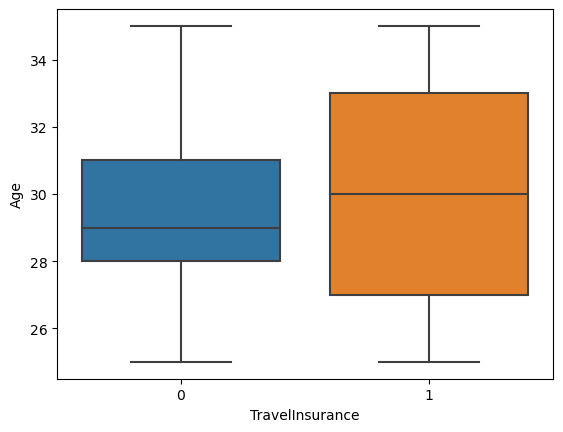

In [42]:
#Data visualization
#Checking relationship between Age and travel insurance
sns.boxplot(x='TravelInsurance',y='Age',data=data)

#Observation
#The majority of individuals who purchased travel insurance are above 30 age .

In [44]:
print(f"minimum annual income = {data['AnnualIncome'].min()}")
print(f"maximum annual income = {data['AnnualIncome'].max()}")

minimum annual income = 300000
maximum annual income = 1800000


<Axes: xlabel='TravelInsurance', ylabel='AnnualIncome'>

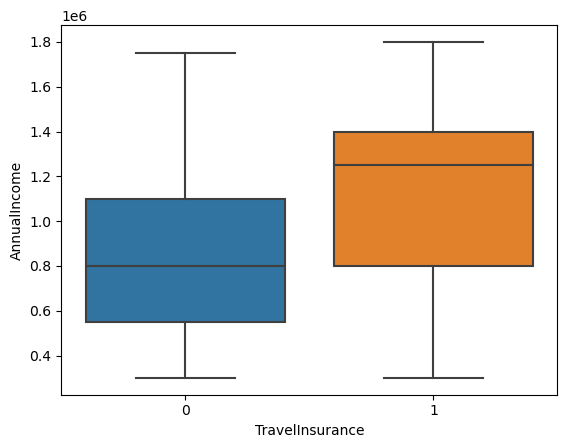

In [45]:
#Relationship between travel insurance and age
sns.boxplot(x='TravelInsurance',y='AnnualIncome',data=data)

#The majority of individuals who purchased travel insurance fall within the 80000 to 140000 annual income group.

<Axes: xlabel='TravelInsurance', ylabel='FamilyMembers'>

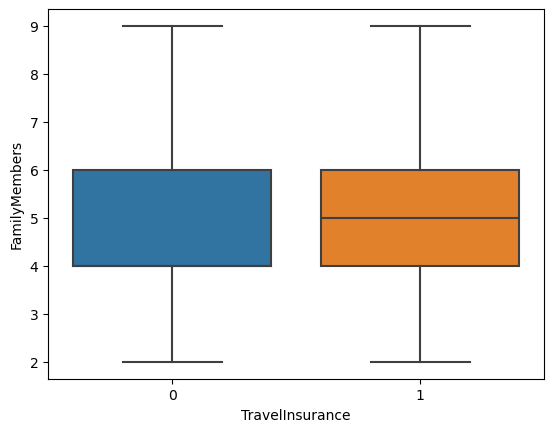

In [46]:
#Relationship between Familymember and travel insurance
sns.boxplot(x='TravelInsurance',y='FamilyMembers',data=data)

#The ratio of Family member in respect to buying the insurance stays the same throughout the whole graph.

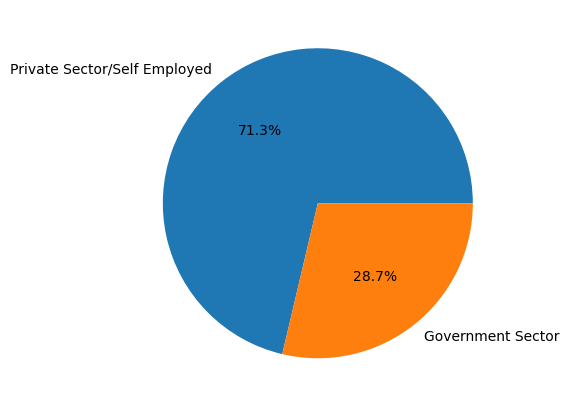

In [47]:
employment_counts = data['Employment Type'].value_counts()
fig = plt.figure(figsize =(5, 7))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%')
plt.show()

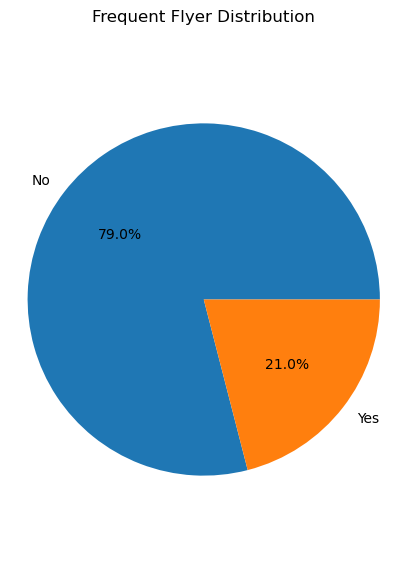

In [48]:
Frequent_Flyer_counts = data['FrequentFlyer'].value_counts()

# Create a pie chart
fig = plt.figure(figsize=(5,7))
plt.pie(Frequent_Flyer_counts, labels=Frequent_Flyer_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.title('Frequent Flyer Distribution')
plt.show()

In [49]:
#Making the dataset all numerical with map function
#Frequent flyer And ever travlelled abroad
# Yes : 1 , No : 0
data['FrequentFlyer'] = data['FrequentFlyer'].map({'Yes':1,'No':0})
data['EverTravelledAbroad']= data['EverTravelledAbroad'].map({'Yes':1,'No':0})

# Government Sector : 1, Private Sector/Self Employed : 0
data['Employment Type'] = data['Employment Type'].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

C:\Users\Aditi nath\AppData\Local\Temp\ipykernel_276\62094217.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

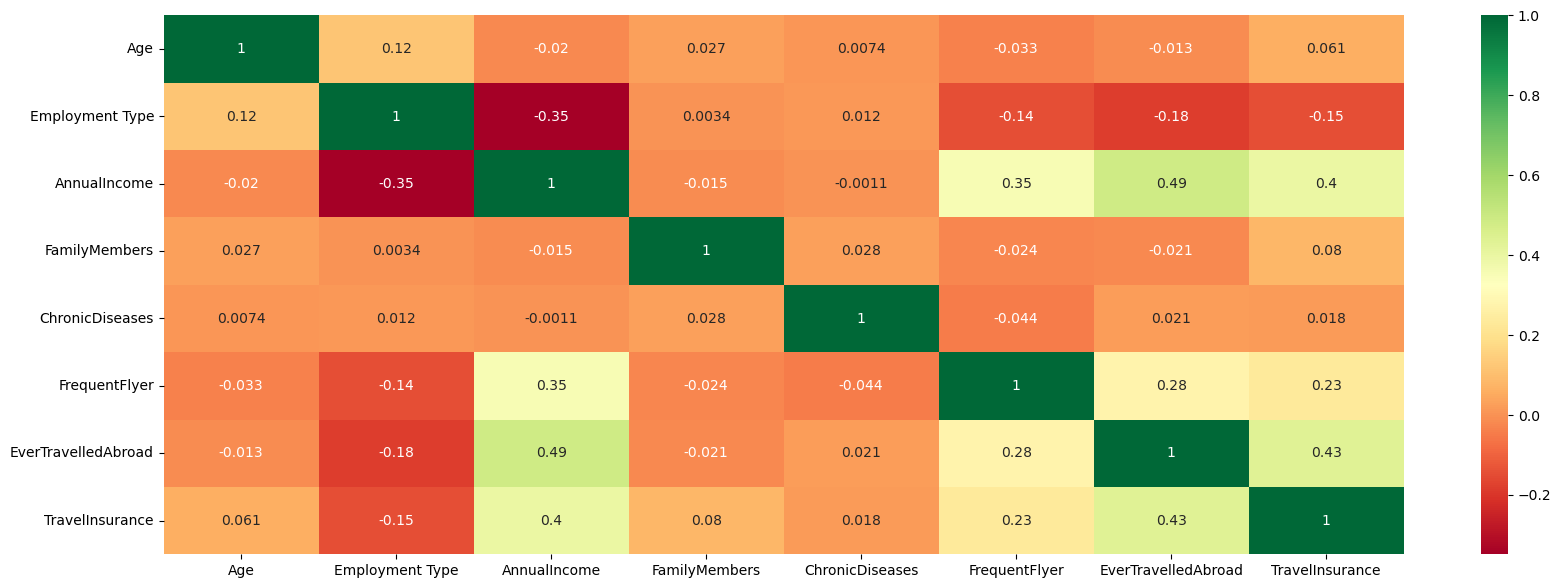

In [50]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


In [51]:
#Observation:-
#Annual income and Ever trvelled abroad have positive correlation
#People who travelled abroad take insurance
#Another interesting finding, it looks like people who did travel abroad are more likely to be frequent flyers.
# because the travel to foreign countries is more expensive and, as we know already, the income plays a huge role in our problem. 

In [52]:
#Rich people and frequent flyer relationship
pltx.histogram(data, x='AnnualIncome', color='FrequentFlyer', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Rich people and frequent flyer relationship.')
#Yes-1 and No -0

In [53]:
#Observation
#People with more income tend to travel more frequently and so they are also more likely to buy an insurance.

In [54]:
#Annual income and employemnt type.
#Goverment employee- 1 and private/self employee = 0
pltx.histogram(data, x='AnnualIncome', color='Employment Type', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Annual income and employemnt type.')

In [55]:
#Observation
#Goverment employee are less paid than private employees so these can be reason behind goverment employee are not taking insurance as they less travel

In [56]:
#How many people are in govt or private sector and are frequent flyer or not?
data_emp_fly = pd.crosstab(data['Employment Type'],data['FrequentFlyer'])
data_emp_fly

FrequentFlyer,0,1
Employment Type,,
0,1067,350
1,503,67


In [57]:
#How many people are in govt or private sector and are purchase travel insurance or not?
data_insurance = pd.crosstab(data['Employment Type'],data['TravelInsurance'])
data_insurance

TravelInsurance,0,1
Employment Type,,
0,847,570
1,430,140


In [58]:

data_emp_fly = pd.crosstab(data['FrequentFlyer'],data['TravelInsurance'])
data_emp_fly

TravelInsurance,0,1
FrequentFlyer,,
0,1099,471
1,178,239


In [59]:
#Conclusion
#The conclusion here is easy to make, the interest around the insurance comes down to the budget.
#We don't know if the company reaches its target audience or not, it could be that the service is targeted to the mid-upper income group of people.

#Suggestion
#Awarness about the insurance through advertisment
#Discounts and Incentives
#Informative brochures that outline the benefits of travel insurance.
#Make sure to include details about coverage for trip cancellations, medical emergencies, lost baggage, and other relevant situations.